# Assignment 1 (50 points)

In [ ]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import torch
from torch import nn as nn
from torch.nn import functional as F

## Problem 1 (20 points)

Optimize the following loss:
$L = (leaky\_relu(w1 * x1 + w2 * x2) - 5) ^ 2$

This represents a single neuron with 2 inputs (x1 and x2) with tunable parameters (w1 and w2). The neuron has leaky relu activation function defined below. The output should be equal to 5. We are measuring the loss using the L2 loss.


$\text{LeakyReLU}(x) = \begin{cases}
x, & \text{if } x > 0 \\
0.01 * x, & \text{otherwise}
\end{cases}$


Hints:
1. Since leaky relu is a piecewise function (is calculated different depending on the value of x), the derivative calculation will also be calculated differently depending on the value of x
2. Consider that:

$sum = w1 * x1 + w2 * x2$

$output = leaky\_relu(sum)$

$L = (output - 5) ^ 2$

How can we use the chain rule to $\frac{\delta L}{\delta w1}$ and $\frac{\delta L}{\delta w2}$?


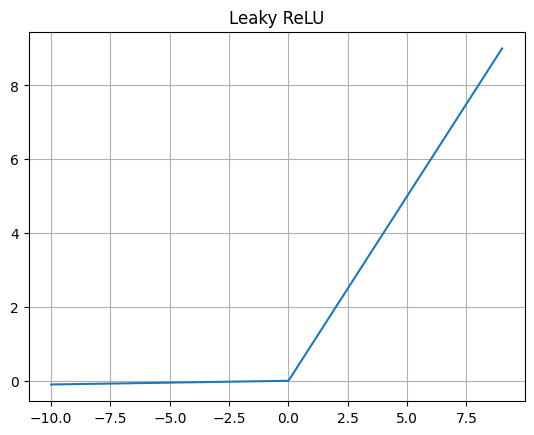

In [ ]:
def leaky_relu(x):
    if x > 0:
        return x
    else:
        return 0.01 * x

xs = np.arange(-10, 10)
ys = [leaky_relu(x) for x in xs]
plt.title('Leaky ReLU')
plt.plot(xs, ys)
plt.grid()

### 1a. Backpropagation by hand (10 points)
Optimize the loss using only python like we did in class. Derive the gradients by hand.

In [ ]:
# initialization

x1 = 5 # data
x2 = 6

w1 = 7 # model params
w2 = 8

lr = 0.01
actual = 5

def leaky_relu_derivative(x):
    if x > 0:
        return 1
    else:
        return 0.01

for i in range(1000):

    sum = x1 * w1 + x2 * w2  # weighted Sum
    output = leaky_relu(sum)
    loss = (output - actual) ** 2

    # Calculate Gradients

    ## dloss/dw1 and dloss/dw2
    # dloss/dw1 = dloss/dleaky_relu(sum) * dleaky_relu(sum)/dsum * dsum/dw1
    # dloss/dw2 = dloss/dleaky_relu(sum) * dleaky_relu(sum)/dsum * dsum/dw2

    dloss_dleaky_reluSum = 2 * (output - actual)
    dleaky_reluSum_dsum = leaky_relu_derivative(sum)
    dsum_dw1 = x1
    dsum_dw2 = x2

    dloss_dw1 = dloss_dleaky_reluSum * dleaky_reluSum_dsum * dsum_dw1
    dloss_dw2 = dloss_dleaky_reluSum * dleaky_reluSum_dsum * dsum_dw2

    w1 = w1 - lr * dloss_dw1
    w2 = w2 - lr * dloss_dw2

    if i % 100 == 0:
      print(f"Iteration {i}: Loss = {loss}")

print(f"Final Optimized weights: w1 = {w1}, w2 = {w2}")
print(leaky_relu(x1 * w1 + x2 * w2))

Iteration 0: Loss = 6084
Iteration 100: Loss = 25.604709690019114
Iteration 200: Loss = 0.05848802764143765
Iteration 300: Loss = 0.0
Iteration 400: Loss = 0.0
Iteration 500: Loss = 0.0
Iteration 600: Loss = 0.0
Iteration 700: Loss = 0.0
Iteration 800: Loss = 0.0
Iteration 900: Loss = 0.0
Final Optimized weights: w1 = 0.6065573770491801, w2 = 0.32786885245901654
5.0


### 1b. Reimplement 1a using torch. (5 points)

Do not use `torch.optim`

In [ ]:
x1 = torch.tensor(3., requires_grad=False) # data
x2 = torch.tensor(4., requires_grad=False)

w1 = torch.tensor(5., requires_grad=True) # model params
w2 = torch.tensor(6., requires_grad=True)

lr = 0.01
actual = 5

for i in range(100):

    sum = x1 * w1 + x2 * w2  # weighted Sum
    loss = (F.leaky_relu(sum) - actual) ** 2

    # Calculate Gradients
    loss.backward()

    # update weights
    with torch.no_grad():
        w1 -= lr * w1.grad
        w2 -= lr * w2.grad

    # Zero gradients after updating
    w1.grad.zero_()
    w2.grad.zero_()

    if i % 10 == 0:
      print(f"Iteration {i}: Loss = {loss.item()}")

pred = (F.leaky_relu(x1*w1 + x2*w2)).detach().item()

print(f"prediction = ", pred)

Iteration 0: Loss = 1156.0
Iteration 10: Loss = 0.001102447509765625
Iteration 20: Loss = 1.0825260687852278e-09
Iteration 30: Loss = 0.0
Iteration 40: Loss = 0.0
Iteration 50: Loss = 0.0
Iteration 60: Loss = 0.0
Iteration 70: Loss = 0.0
Iteration 80: Loss = 0.0
Iteration 90: Loss = 0.0
prediction =  5.0


### 1c. Implement a 2 layer neural network. (5 points)

The neural network should be able to take inputs of size [4, 32] (batch size of 4 with 32 features per sample). The first layer should have have an output dimension of 8 and use the leaky relu activation. The second layer should not use an activation function.

Train the model so that it outputs 5. Use an L2 loss as we did in 1a and 1b.

[Pytorch docs on how to use leaky relu]("https://pytorch.org/docs/stable/generated/torch.nn.LeakyReLU.html")

In [ ]:
class MLP(nn.Module):
    def __init__(self):
        # implement
        super(MLP, self).__init__()
        self.fc1 = nn.Linear(32, 8)
        self.fc2 = nn.Linear(8, 1)
    def forward(self, x):
        # implement
        x = F.leaky_relu(self.fc1(x))
        x = self.fc2(x)
        return x

x = torch.randn((4, 32)).float()
target = torch.tensor([5.0])
model1 = MLP()

lr = 0.01

for i in range(100):
    # implement
    prediction = model1(x).mean()

    loss = (prediction - target)**2
    loss.backward()

    with torch.no_grad():
        for param in model1.parameters():
            param -= lr * param.grad

    model1.zero_grad()

    if i % 10 == 0:
      print(f"Iteration {i}: Loss = {loss.item()}")

prediction = model1(x).mean().item()
print(f"{prediction = }")


Iteration 0: Loss = 28.497886657714844
Iteration 10: Loss = 0.25000858306884766
Iteration 20: Loss = 3.997856765636243e-07
Iteration 30: Loss = 9.094947017729282e-13
Iteration 40: Loss = 0.0
Iteration 50: Loss = 0.0
Iteration 60: Loss = 0.0
Iteration 70: Loss = 0.0
Iteration 80: Loss = 0.0
Iteration 90: Loss = 0.0
prediction = 5.0


## Problem 2 (30 points)

The objective is predict 0.6. This time, we will use an L1 loss, a sigmoid activation function, and 3 inputs instead. Specifically,


$prediction = sigmoid(w1 * x1 + w2 * x2 + w3 * x3)$

$loss = l1(prediction, 0.6)$

where $sigmoid$ and $l1$ is defined as:

$sigmoid(x) = \frac{1}{1+e^{-x}}$

and $l1(prediction, target) = absolute\_value(prediction - target)$

$\text{absolute_value}(x) = \begin{cases}
x, & \text{if } x > 0 \\
-x, & \text{otherwise}
\end{cases}$


Note that the absolute value function is a piece wise function, similar to leaky_relu.

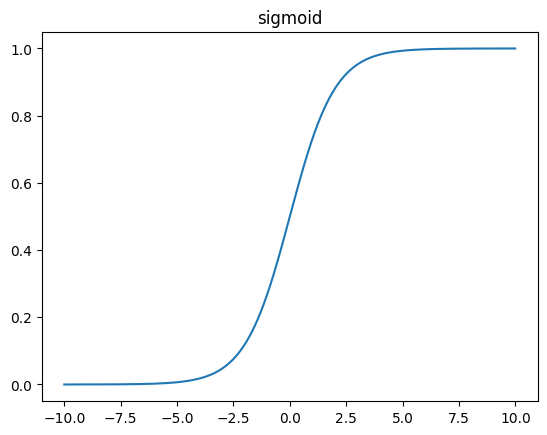

In [ ]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

xs = np.arange(-10, 10, 0.01)

ys = [sigmoid(x) for x in xs]
plt.title('sigmoid')
plt.plot(xs, ys)

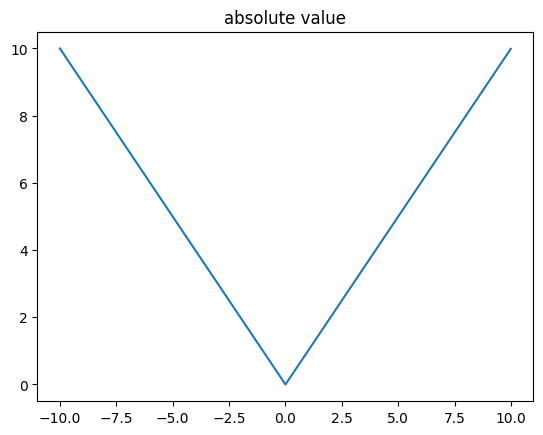

In [ ]:
def absolute_value(x):
    if x < 0:
        return -x
    else:
        return x

xs = np.arange(-10, 10, 0.01)

ys = [absolute_value(x) for x in xs]
plt.title('absolute value')
plt.plot(xs, ys)

### 2a. Backpropagation by hand (15 points)
Optimize the loss using only python like we did in class. Derive the gradients by hand.

In [ ]:
# initialization

x1, x2, x3 = 0.5, 0.6, 0.7 # data
w1, w2, w3 = 0.7, 0.8, 0.9 # model

lr = 0.01
target = 0.6

def sigmoid_derivative(x):
    return sigmoid(x) * (1 - sigmoid(x))

## For using L1 Loss function:
# pred = sigmoid(x1*w1 + x2*w2 + x3*w3)
# L1Loss = |pred - 0.6|

for i in range(1000):
    # implement here

    sum = x1*w1 + x2*w2 + x3*w3
    pred = sigmoid(sum)

    loss = absolute_value(pred - target)

    ## dloss/dw1 , dloss/dw2 , dloss/dw3
    # dloss/dw1 = dloss/dpred * dpred/dw1
    # dloss/dw2 = dloss/dpred * dpred/dw2
    # dloss/dw3 = dloss/dpred * dpred/dw3

    dloss_dpred = 1 if pred > target else -1
    dpred_dw1 = sigmoid_derivative(sum) * x1
    dpred_dw2 = sigmoid_derivative(sum) * x2
    dpred_dw3 = sigmoid_derivative(sum) * x3

    # chain rule
    dloss_dw1 = dloss_dpred * dpred_dw1
    dloss_dw2 = dloss_dpred * dpred_dw2
    dloss_dw3 = dloss_dpred * dpred_dw3

    # update w
    w1 = w1 - lr * dloss_dw1
    w2 = w2 - lr * dloss_dw2
    w3 = w3 - lr * dloss_dw3

    if i % 100 == 0:
        print(f"iteration {i}: Prediction = {pred}, Loss = {loss}")

print(sigmoid(x1 * w1 + x2 * w2 + x3 * w3))

iteration 0: Prediction = 0.8115326747861805, Loss = 0.21153267478618054
iteration 100: Prediction = 0.7829040347865712, Loss = 0.18290403478657125
iteration 200: Prediction = 0.7475580355129442, Loss = 0.14755803551294422
iteration 300: Prediction = 0.7042022897056351, Loss = 0.10420228970563516
iteration 400: Prediction = 0.6520199305878219, Loss = 0.05201993058782195
iteration 500: Prediction = 0.6003441694032661, Loss = 0.00034416940326609247
iteration 600: Prediction = 0.6003608920642353, Loss = 0.0003608920642352853
iteration 700: Prediction = 0.6003776168210107, Loss = 0.0003776168210106734
iteration 800: Prediction = 0.600394343673523, Loss = 0.00039434367352297883
iteration 900: Prediction = 0.6004110726217029, Loss = 0.0004110726217029237
0.6004278036654809


### 2b. Reimplement 2a using torch. (5 points)

Do not use `torch.optim`

In [ ]:
# implement here (follow the structure of 1b)

x1 = torch.tensor(0.5, requires_grad=False) # data
x2 = torch.tensor(0.6, requires_grad=False)
x3 = torch.tensor(0.7, requires_grad=False)

w1 = torch.tensor(0.7, requires_grad=True) # model params
w2 = torch.tensor(0.8, requires_grad=True)
w3 = torch.tensor(0.9, requires_grad=True)

lr = 0.01
target = torch.tensor(0.6)

for i in range(1000):

    sum = x1*w1 + x2*w2 + x3*w3
    pred = torch.sigmoid(sum)

    loss = torch.abs(pred - target)

    # Calculate Gradients
    loss.backward()

    # update weights
    with torch.no_grad():
        w1 -= lr * w1.grad
        w2 -= lr * w2.grad
        w3 -= lr * w3.grad

    # Zero gradients after updating
    w1.grad.zero_()
    w2.grad.zero_()
    w3.grad.zero_()

    if i % 100 == 0:
      print(f"Iteration {i}: Loss = {loss.item()}")

with torch.no_grad():
    final_pred = sigmoid(w1 * x1 + w2 * x2 + w3 * x3)
    print("Final prediction:", final_pred.item())

Iteration 0: Loss = 0.21153265237808228
Iteration 100: Loss = 0.1829039454460144
Iteration 200: Loss = 0.14755785465240479
Iteration 300: Loss = 0.10420197248458862
Iteration 400: Loss = 0.052019596099853516
Iteration 500: Loss = 0.0003437995910644531
Iteration 600: Loss = 0.0003605484962463379
Iteration 700: Loss = 0.00037723779678344727
Iteration 800: Loss = 0.00039398670196533203
Iteration 900: Loss = 0.0004107356071472168
Final prediction: 0.6004274487495422


### 2c. Implement a 2 layer neural network. (10 points)

The neural network should be able to take inputs of size [4, 32] (batch size of 4 with 32 features per sample). The first layer should have have an output dimension of 8 and use the sigmoid activation. The second layer should also use a sigmoid activation function.

Train the model so that it outputs 0.6. Use an L2 loss as we did in 1a and 1b.

[PyTorch docs for how to use sigmoid](https://pytorch.org/docs/stable/generated/torch.nn.Sigmoid.html)

In [ ]:
# implement here (follow the structure of 1c)

class TwoLayerMLP(nn.Module):
    def __init__(self):
        super(TwoLayerMLP, self).__init__()

        self.layer1 = nn.Linear(32,8)
        self.layer2 = nn.Linear(8,1)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        x = self.sigmoid(self.layer1(x))
        x = self.sigmoid(self.layer2(x))
        return x

model2 = TwoLayerMLP()
input = torch.randn((4, 32)).float()
target = torch.tensor(0.6)

L2_Loss = nn.MSELoss()
lr = 0.01

for i in range(1000):

    pred = model2(input).mean()

    loss = L2_Loss(pred, target)
    loss.backward()

    with torch.no_grad():
        for p in model2.parameters():
            p -= lr * p.grad

    model2.zero_grad()

    if i % 100 == 0:
        print(f"iteration {i}: Prediction = {pred.item()}, Loss = {loss.item()}")

final_pred = model2(input).mean()
print("Final Prediction = ", final_pred.item())




iteration 0: Prediction = 0.6503596901893616, Loss = 0.0025360959116369486
iteration 100: Prediction = 0.633595883846283, Loss = 0.0011286818189546466
iteration 200: Prediction = 0.6221455335617065, Loss = 0.0004904235829599202
iteration 300: Prediction = 0.614488959312439, Loss = 0.00020992924692109227
iteration 400: Prediction = 0.6094352006912231, Loss = 8.90225637704134e-05
iteration 500: Prediction = 0.6061260104179382, Loss = 3.752771226572804e-05
iteration 600: Prediction = 0.6039699912071228, Loss = 1.5760640962980688e-05
iteration 700: Prediction = 0.6025696992874146, Loss = 6.603231668123044e-06
iteration 800: Prediction = 0.6016620397567749, Loss = 2.7622968445939478e-06
iteration 900: Prediction = 0.6010744571685791, Loss = 1.1544069593583117e-06
Final Prediction =  0.6006944179534912
